# Задачи

### 1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

### 2.Какой клиент совершил больше всего успешных операций? (success == True)

### 3.С какой платформы осуществляется наибольшее количество успешных операций?

### 4.Какую платформу предпочитают премиумные клиенты?

### 5.Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

### 6.Постройте график распределения числа успешных операций

### 7.Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?


In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

%matplotlib inline 
# указываем на то, что хотим, чтобы графики рисовались 
# сразу в Jypyter Notebook

In [4]:
user_data = pd.read_csv('~/shared/homeworks/python_ds_miniprojects/3/user_data.csv')
logs = pd.read_csv('~/shared/homeworks/python_ds_miniprojects/3/logs.csv')
user_data.head()
list(user_data.age.unique())

[58,
 55,
 64,
 44,
 49,
 36,
 34,
 48,
 42,
 59,
 24,
 40,
 25,
 21,
 31,
 69,
 53,
 35,
 38,
 52,
 27,
 50,
 20,
 63,
 39,
 26,
 37,
 62,
 43,
 46,
 41,
 23,
 28,
 29,
 68,
 51,
 30,
 61,
 22,
 65,
 47,
 66,
 57,
 32,
 60,
 45,
 67,
 56,
 54,
 33]

In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


### 2.Какой клиент совершил больше всего успешных операций? (success == True)


In [6]:
# Отсортируем в датасете logs только те значения, где операция прошла успешно, сгруппируем полученный датасет по клиентами и
# посчитаем количество успешных операций для каждого. Отсортируем полученные данные по убыванию количества успешных операций.
# Преобразуем датасет, оставляя только тех клиентов, у которых максимальное значение успешных действий.
# Отсортируем по номеру клиента, выберем серию "client" и сделаем из нее список, получив ответ в то мже формате, как просят
# в задании (по возрастанию, через запятую)
success_logs = logs.query('success == True').groupby('client', as_index=False).agg({'success': 'count'}) \
    .sort_values('success', ascending=False)
list(success_logs.query('success == success.max()').sort_values('client').client)


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

### 3.С какой платформы осуществляется наибольшее количество успешных операций?


In [7]:
logs.query('success == True').groupby('platform').agg({'client': 'count'}).sort_values('client', ascending=False).head(1)

,client
platform,
phone,2019


### 4.Какую платформу предпочитают премиумные клиенты?


In [8]:
premium_df = user_data.merge(right=logs, on='client')
premium_df.query('premium == True').groupby('platform').agg({'client': 'count'}).sort_values('client', ascending=False).head(1)

,client
platform,
phone,246


### 5.Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


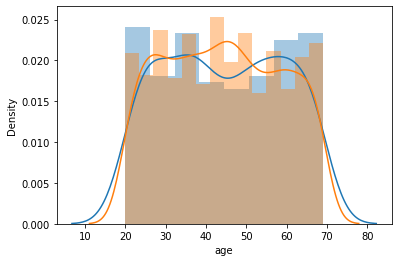

In [9]:
user_data.groupby(['age', 'premium'], as_index=False).agg({'client': 'count'})
# sns.displot(data=user_data.query('premium == True'), x='age')
# sns.displot(data=user_data.query('premium == False'), x='age')
sns.distplot(user_data.query('premium == True').age)
sns.distplot(user_data.query('premium == False').age)

### 6.Постройте график распределения числа успешных операций
x – число успешных операций

y – число клиентов, совершивших столько успешных операций

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


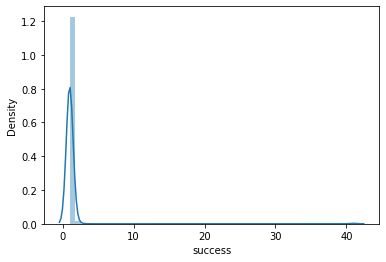

In [10]:
sns.distplot(success_logs.success)

### 7.Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?


In [11]:
computer_success = premium_df